<a href="https://colab.research.google.com/github/egenc/DataScience_tasks/blob/main/ODDA_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/dataset/ODDA/DataScienceInterviewODDA.zip

Archive:  /content/drive/MyDrive/dataset/ODDA/DataScienceInterviewODDA.zip
replace Data Science Interview ODDA/Data Science Interview - MW ODDA.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data Science Interview ODDA/Data Science Interview - MW ODDA.docx  
  inflating: Data Science Interview ODDA/INTERVIEW TEST SET.xlsx.csv  
  inflating: Data Science Interview ODDA/INTERVIEW TRAIN SET.xlsx  


Input file is 33MB. This is quite big to handle with my machine (low computational resources). Therefore, I will only take first 25_000 rows into account.

To improve this:
- Saving `.parquet` format instead of excel would be a better approach to handle. (It will take less space in storage)
- I didn't use pyspark for time restrictions. Pandas is pretty good for a start in terms of readability and easy-to-type. However, pyspark is more robust in terms of scalability, repartitioning, caching, lazy-working.
- Using a machine with more memory would also work since Pandas loads dataframes into memory.

# 1) Read & Describe Data

In [ ]:
import pandas as pd

FILE_PATH = "/content/Data Science Interview ODDA/INTERVIEW TRAIN SET.xlsx"
df_raw = pd.read_excel(FILE_PATH, nrows=25_000)
df_raw.head()

,ASIN_anon,DATE,BRAND,CBU,Avg_Sales_Prc,Brand_Spends,Brand_clicks,Brand_impressions,Category_Adjacent_Spends,Competitive_clicks,...,Category_search_impressions,GLANCE_VIEWS,MonthOfYear,Organic_Growth,PRIME_DAY,REP_OOS,SnSDiscount,TradePromoFlag,postCovid,ORD_UNITS
0,100,20190501,M&M,CHOCOLATE,19.2,0.0,0,0,0.0,0,...,0,52.0,5,121,0,1.92,0.080769,0,0,33
1,100,20190502,M&M,CHOCOLATE,19.2,0.0,0,0,0.0,0,...,0,29.0,5,122,0,0.00,0.088889,0,0,28
2,100,20190503,M&M,CHOCOLATE,19.2,0.0,0,0,0.0,0,...,0,50.0,5,123,0,2.00,0.118182,0,0,35
3,100,20190504,M&M,CHOCOLATE,19.2,0.0,0,0,0.0,0,...,0,35.0,5,124,0,0.00,0.100000,0,0,27
4,100,20190505,M&M,CHOCOLATE,19.2,0.0,0,0,0.0,0,...,0,57.0,5,125,0,0.00,0.089474,0,0,45


# This is a Regression Problem.

Let's see how many different product types.

In [ ]:
df_raw["CBU"].unique()

array(['CHOCOLATE', 'FRUITY CONFECTIONARY'], dtype=object)

and brands:

In [ ]:
df_raw["BRAND"].unique()

array(['M&M', 'SNICKERS', 'TWIX', 'STARBURST', 'SKITTLES', 'VARIETY BAG'],
      dtype=object)

Both Brands and CBUs need to be analyzed respectively in terms of a more visible relations and decisions. However, there is no time to handle all product types. Therefore, I will go with just with one Product type: **CHOCOLATE** and using all **BRANDS**.

In [ ]:
df_raw = df_raw[df_raw["CBU"] == "CHOCOLATE"]
df_raw.head()

,ASIN_anon,DATE,BRAND,CBU,Avg_Sales_Prc,Brand_Spends,Brand_clicks,Brand_impressions,Category_Adjacent_Spends,Competitive_clicks,...,Category_search_impressions,GLANCE_VIEWS,MonthOfYear,Organic_Growth,PRIME_DAY,REP_OOS,SnSDiscount,TradePromoFlag,postCovid,ORD_UNITS
0,100,20190501,M&M,CHOCOLATE,19.2,0.0,0,0,0.0,0,...,0,52.0,5,121,0,1.92,0.080769,0,0,33
1,100,20190502,M&M,CHOCOLATE,19.2,0.0,0,0,0.0,0,...,0,29.0,5,122,0,0.00,0.088889,0,0,28
2,100,20190503,M&M,CHOCOLATE,19.2,0.0,0,0,0.0,0,...,0,50.0,5,123,0,2.00,0.118182,0,0,35
3,100,20190504,M&M,CHOCOLATE,19.2,0.0,0,0,0.0,0,...,0,35.0,5,124,0,0.00,0.100000,0,0,27
4,100,20190505,M&M,CHOCOLATE,19.2,0.0,0,0,0.0,0,...,0,57.0,5,125,0,0.00,0.089474,0,0,45


In [ ]:
df_raw.columns

Index(['ASIN_anon', 'DATE', 'BRAND', 'CBU', 'Avg_Sales_Prc', 'Brand_Spends',
       'Brand_clicks', 'Brand_impressions', 'Category_Adjacent_Spends',
       'Competitive_clicks', 'Competitive_impressions',
       'DOTDPrime_Day_tp_PromoFlag', 'DOTD_SC_PromoFlag', 'DayOfWeek',
       'Category_search_Spends', 'Category_search_clicks',
       'Category_search_impressions', 'GLANCE_VIEWS', 'MonthOfYear',
       'Organic_Growth', 'PRIME_DAY', 'REP_OOS', 'SnSDiscount',
       'TradePromoFlag', 'postCovid', 'ORD_UNITS'],
      dtype='object')

In [ ]:
df_raw.describe()

,ASIN_anon,DATE,Avg_Sales_Prc,Brand_Spends,Brand_clicks,Brand_impressions,Category_Adjacent_Spends,Competitive_clicks,Competitive_impressions,DOTDPrime_Day_tp_PromoFlag,...,Category_search_impressions,GLANCE_VIEWS,MonthOfYear,Organic_Growth,PRIME_DAY,REP_OOS,SnSDiscount,TradePromoFlag,postCovid,ORD_UNITS
count,21332.000000,2.133200e+04,21332.000000,21332.000000,21332.000000,21332.000000,21332.000000,21332.000000,21332.000000,21332.000000,...,21332.000000,21330.000000,21332.000000,21332.000000,21332.000000,21332.000000,21332.000000,21332.000000,21332.000000,21332.000000
mean,129.235702,2.019531e+07,18.586062,1.548589,3.811176,215.124320,0.485555,0.290456,214.795518,0.000234,...,1653.576364,123.069995,6.447544,338.127695,0.004641,4.874868,0.086819,0.001219,0.297394,51.643493
std,17.810683,4.798111e+03,7.064470,6.063603,16.432657,801.480938,2.929909,1.893468,1302.461853,0.015308,...,5033.526553,523.350656,2.974808,136.778194,0.067968,16.638925,0.032839,0.034891,0.457122,107.125275
min,100.000000,2.019050e+07,1.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,113.000000,2.019082e+07,14.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,29.000000,5.000000,220.000000,0.000000,0.000000,0.070085,0.000000,0.000000,11.000000
50%,126.000000,2.019120e+07,18.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,62.000000,7.000000,326.000000,0.000000,0.000000,0.087971,0.000000,0.000000,25.000000
75%,147.000000,2.020041e+07,20.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,982.250000,159.000000,8.000000,451.000000,0.000000,2.470000,0.107682,0.000000,1.000000,55.000000
max,158.000000,2.020083e+07,99.360000,354.000000,1172.000000,25365.000000,173.360000,65.000000,45036.000000,1.000000,...,148394.000000,62881.000000,12.000000,609.000000,1.000000,115.380000,0.587332,1.000000,1.000000,8707.000000


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21332 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ASIN_anon                    21332 non-null  int64  
 1   DATE                         21332 non-null  int64  
 2   BRAND                        21332 non-null  object 
 3   CBU                          21332 non-null  object 
 4   Avg_Sales_Prc                21332 non-null  float64
 5   Brand_Spends                 21332 non-null  float64
 6   Brand_clicks                 21332 non-null  int64  
 7   Brand_impressions            21332 non-null  int64  
 8   Category_Adjacent_Spends     21332 non-null  float64
 9   Competitive_clicks           21332 non-null  int64  
 10  Competitive_impressions      21332 non-null  int64  
 11  DOTDPrime_Day_tp_PromoFlag   21332 non-null  int64  
 12  DOTD_SC_PromoFlag            21332 non-null  int64  
 13  DayOfWeek       

In [ ]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df_raw.columns:
    print(f'{col} : {df_raw[col].unique()}')

ASIN_anon : [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 136 137 138 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158]
DATE : [20190501 20190502 20190503 20190504 20190505 20190506 20190507 20190508
 20190509 20190510 20190511 20190512 20190513 20190514 20190515 20190516
 20190517 20190518 20190519 20190520 20190521 20190522 20190523 20190524
 20190525 20190526 20190527 20190528 20190529 20190530 20190531 20190601
 20190602 20190603 20190604 20190605 20190606 20190607 20190608 20190609
 20190610 20190611 20190612 20190613 20190614 20190615 20190616 20190617
 20190618 20190619 20190620 20190621 20190622 20190623 20190624 20190625
 20190626 20190627 20190628 20190629 20190630 20190701 20190702 20190703
 20190704 20190705 20190706 20190707 20190708 20190709 20190710 20190711
 20190712 20190713 20190714 20190715 20190716 20190717 20190718 20190719
 20190720 20190721 20190722 20190723 201907

In [ ]:
# Replacing unknown string values (?, -) with NaN values
import numpy as np

for col in df_raw.columns:
    df_raw[col].replace({'?':np.nan},inplace=True)
    df_raw[col].replace({'-':np.nan},inplace=True)

In [ ]:
df_raw.isnull().sum()

ASIN_anon                      0
DATE                           0
BRAND                          0
CBU                            0
Avg_Sales_Prc                  0
Brand_Spends                   0
Brand_clicks                   0
Brand_impressions              0
Category_Adjacent_Spends       0
Competitive_clicks             0
Competitive_impressions        0
DOTDPrime_Day_tp_PromoFlag     0
DOTD_SC_PromoFlag              0
DayOfWeek                      0
Category_search_Spends         0
Category_search_clicks         0
Category_search_impressions    0
GLANCE_VIEWS                   2
MonthOfYear                    0
Organic_Growth                 0
PRIME_DAY                      0
REP_OOS                        0
SnSDiscount                    0
TradePromoFlag                 0
postCovid                      0
ORD_UNITS                      0
dtype: int64

There are two NaN values in GLANCE_VIEWS column. They need to be removed.

There are several reasons why we need to remove missing values:

- Missing values can cause errors in data analysis and modeling: Many machine learning algorithms cannot handle missing values, and will either raise errors or produce incorrect results.

- Missing values can reduce the sample size: The presence of missing values reduces the number of observations available for analysis. This can negatively impact the accuracy and robustness of the results.

- Missing values can introduce bias: The distribution of missing values may not be random, and they can introduce bias into the results if they are not handled appropriately.

- Missing values can impact the accuracy of the models: Machine learning models make predictions based on patterns in the data. If some observations are missing, this can make it difficult for the model to accurately capture the relationships in the data.

In [ ]:
df_raw = df_raw.dropna()
df_raw.isnull().sum()

ASIN_anon                      0
DATE                           0
BRAND                          0
CBU                            0
Avg_Sales_Prc                  0
Brand_Spends                   0
Brand_clicks                   0
Brand_impressions              0
Category_Adjacent_Spends       0
Competitive_clicks             0
Competitive_impressions        0
DOTDPrime_Day_tp_PromoFlag     0
DOTD_SC_PromoFlag              0
DayOfWeek                      0
Category_search_Spends         0
Category_search_clicks         0
Category_search_impressions    0
GLANCE_VIEWS                   0
MonthOfYear                    0
Organic_Growth                 0
PRIME_DAY                      0
REP_OOS                        0
SnSDiscount                    0
TradePromoFlag                 0
postCovid                      0
ORD_UNITS                      0
dtype: int64

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21330 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ASIN_anon                    21330 non-null  int64  
 1   DATE                         21330 non-null  int64  
 2   BRAND                        21330 non-null  object 
 3   CBU                          21330 non-null  object 
 4   Avg_Sales_Prc                21330 non-null  float64
 5   Brand_Spends                 21330 non-null  float64
 6   Brand_clicks                 21330 non-null  int64  
 7   Brand_impressions            21330 non-null  int64  
 8   Category_Adjacent_Spends     21330 non-null  float64
 9   Competitive_clicks           21330 non-null  int64  
 10  Competitive_impressions      21330 non-null  int64  
 11  DOTDPrime_Day_tp_PromoFlag   21330 non-null  int64  
 12  DOTD_SC_PromoFlag            21330 non-null  int64  
 13  DayOfWeek       

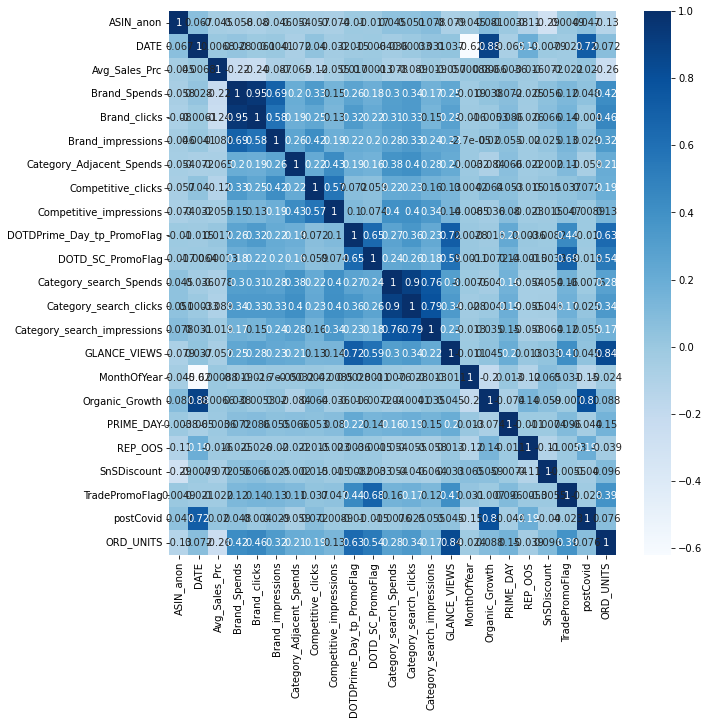

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find correlations between columns
plt.figure(figsize=(10,10))
sns.heatmap(df_raw.corr(),cbar=True,annot=True,cmap='Blues')

**One of the most important steps of data science is to find correlations between features.** As it is seen from the illustrated correlations above, we need to consider the columns that has direct affect on ORD_UNITS such as:
- SnSDiscount
- GLANCE_VIEWS
- DOTDPrime_Day_tp_PromoFlag (not taking this into account since it has a strong relationship with GLANCE_VIEWS - which is already being used)
- Brand_clicks
- MonthOfYear


Text(0, 0.5, 'ORD_UNITS')

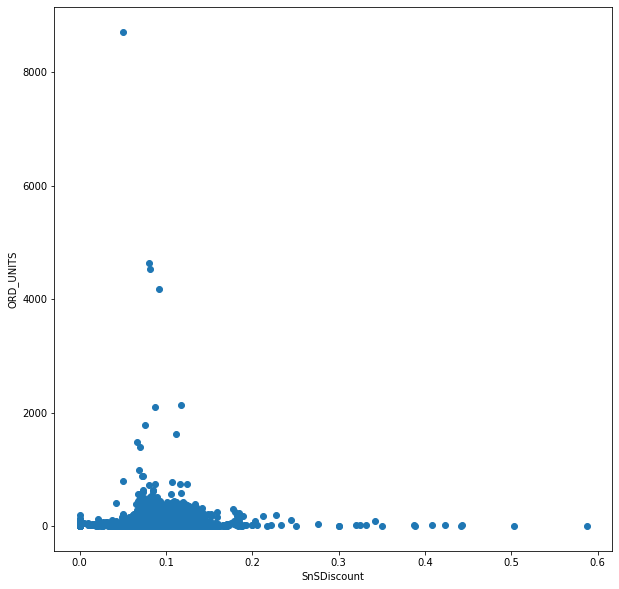

In [ ]:
## From the outpu above, it looks the most correlated columns are SnSDiscount, GLANCE_VIEWS, Brand_clicks, MonthOfYear
# correspoding to output: ORD_UNITS
## So I will be focusing on them.
plt.figure(figsize=(10,10))
plt.scatter(x='SnSDiscount',y='ORD_UNITS',data=df_raw)
plt.xlabel('SnSDiscount')
plt.ylabel('ORD_UNITS')

As it is seen above, discounts are not always positively affecting the ORD_UNITS

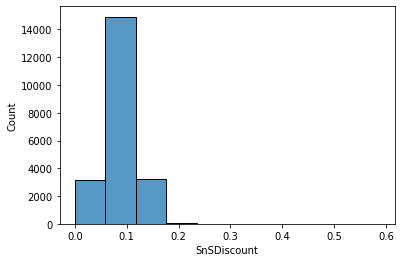

In [ ]:
sns.histplot(df_raw.SnSDiscount,bins=10)

Most products are discounted by 0.1

Text(0, 0.5, 'ORD_UNITS')

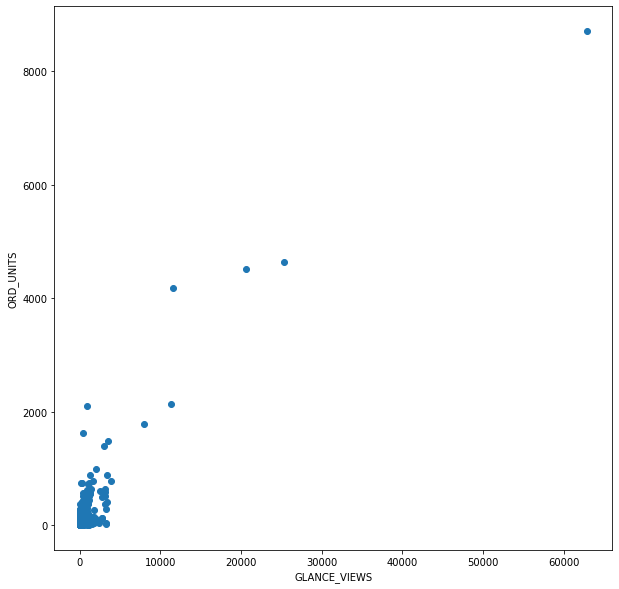

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='GLANCE_VIEWS',y='ORD_UNITS',data=df_raw)
plt.xlabel('GLANCE_VIEWS')
plt.ylabel('ORD_UNITS')

This feauture seems to have a direct affect on the outcome. (Linearity)

Text(0, 0.5, 'ORD_UNITS')

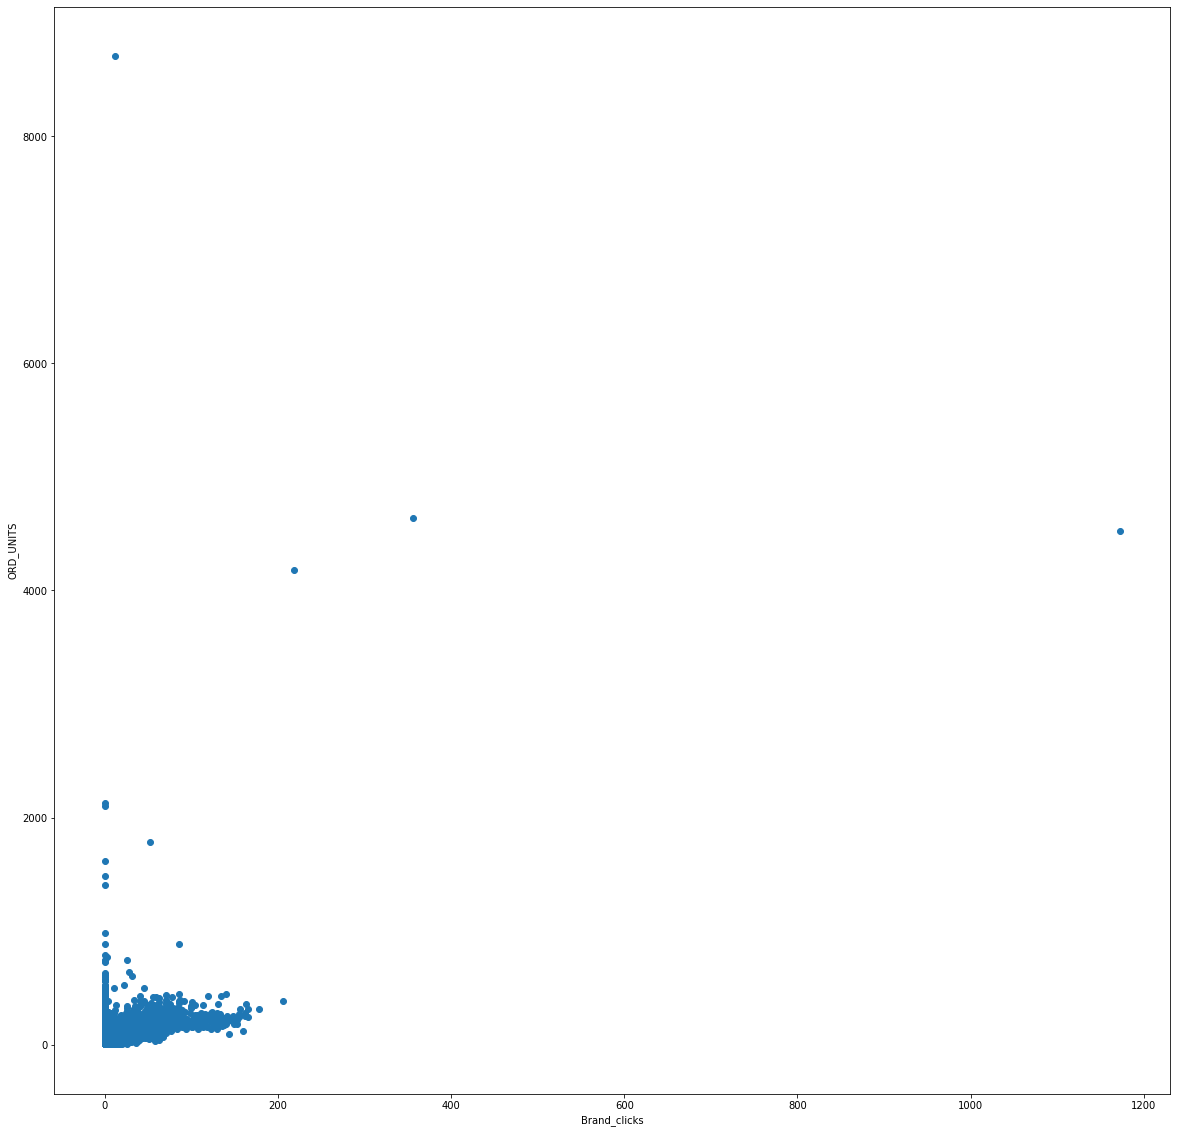

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(x='Brand_clicks',y='ORD_UNITS',data=df_raw)
plt.xlabel('Brand_clicks')
plt.ylabel('ORD_UNITS')

This feature also has a linearity but the slope is smaller (which might a slight linearity improvement)

In [ ]:
## Checking if months are correct (such as month 13 is impossible)
df_raw["MonthOfYear"].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4])

Text(0, 0.5, 'ORD_UNITS')

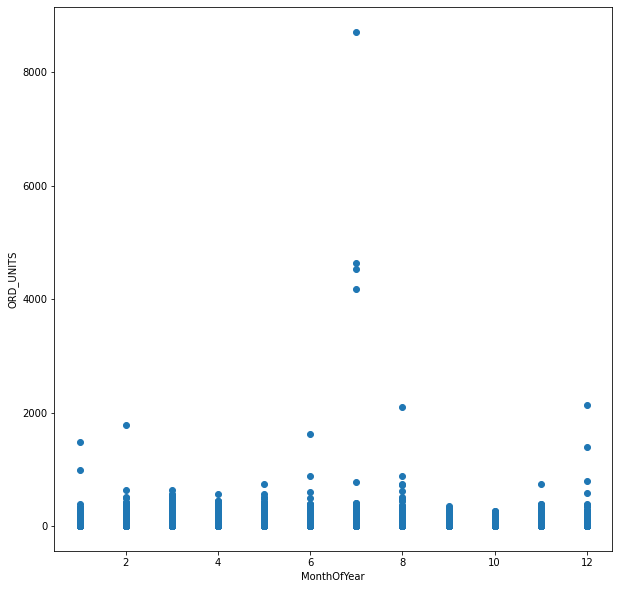

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='MonthOfYear',y='ORD_UNITS',data=df_raw)
plt.xlabel('MonthOfYear')
plt.ylabel('ORD_UNITS')

Some months are more important to attract customers as it is illustrated above.

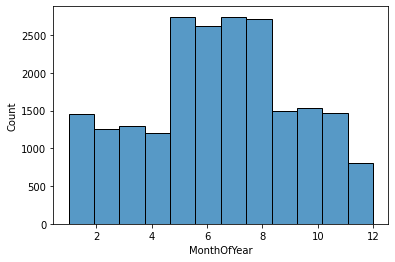

In [ ]:
sns.histplot(df_raw.MonthOfYear,bins=12) ## 12 for nu

Applying price adjustments in summer time might directly affect the income without much effort.

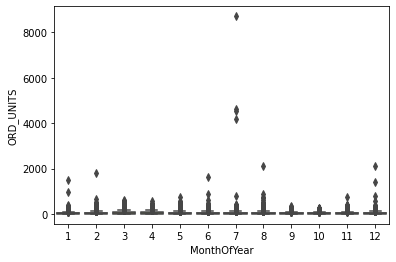

In [ ]:
sns.boxplot(x='MonthOfYear',y='ORD_UNITS',data=df_raw)

In [ ]:
# For a start - let's focus on the columns that we illustrated above

df = df_raw[["MonthOfYear", "Brand_clicks", "GLANCE_VIEWS", "SnSDiscount", "ORD_UNITS"]]

df.head(-5)

,MonthOfYear,Brand_clicks,GLANCE_VIEWS,SnSDiscount,ORD_UNITS
0,5,0,52.0,0.080769,33
1,5,0,29.0,0.088889,28
2,5,0,50.0,0.118182,35
3,5,0,35.0,0.100000,27
4,5,0,57.0,0.089474,45
...,...,...,...,...,...
24990,5,0,194.0,0.065612,131
24991,5,0,160.0,0.069560,83
24992,5,0,105.0,0.075083,73
24993,5,0,123.0,0.091703,84


We need to normalize this data.

MinMaxScaler should be applied to each column independently. This is because each feature in your data may have a different range and MinMaxScaling is applied to each feature to bring them to the same scale. If you apply MinMaxScaler to the entire dataset, then all the features will be rescaled based on the maximum and minimum values of the entire dataset, rather than just for that individual feature.

For example, consider a dataset with two features, GLANCE_VIEWS and SnSDiscount, where GLANCE_VIEWS ranges from 0 to 10_000 and SnSDiscount ranges from 0 to 0.5. If you apply MinMaxScaler to the entire dataset, then the values of GLANCE_VIEWS will be rescaled based on the range 0 to 1,000,000, which would significantly distort the values of GLANCE_VIEWS. On the other hand, if you apply MinMaxScaler to each feature independently, then GLANCE_VIEWS will be rescaled based on the range 0 to 10_000 and SnSDiscount will be rescaled based on the range 0 to 0.5, which would preserve the original distributions of the features.

In [ ]:
## Data has to be normalized because we need to give each feature same importance
from sklearn.preprocessing import MinMaxScaler

df = df.copy(deep=False)
# Scale each column independently
scaler_MonthOfYear = MinMaxScaler()
df["MonthOfYear_normalized"] = scaler_MonthOfYear.fit_transform(df[["MonthOfYear"]])

scaler_Brand_clicks = MinMaxScaler()
df["Brand_clicks_normalized"] = scaler_Brand_clicks.fit_transform(df[["Brand_clicks"]])

scaler_GLANCE_VIEWS = MinMaxScaler()
df["GLANCE_VIEWS_normalized"] = scaler_GLANCE_VIEWS.fit_transform(df[["GLANCE_VIEWS"]])

scaler_SnSDiscount = MinMaxScaler()
df["SnSDiscount_normalized"] = scaler_SnSDiscount.fit_transform(df[["SnSDiscount"]])

df.head()

,MonthOfYear,Brand_clicks,GLANCE_VIEWS,SnSDiscount,ORD_UNITS,MonthOfYear_normalized,Brand_clicks_normalized,GLANCE_VIEWS_normalized,SnSDiscount_normalized
0,5,0,52.0,0.080769,33,0.363636,0.0,0.000827,0.137519
1,5,0,29.0,0.088889,28,0.363636,0.0,0.000461,0.151344
2,5,0,50.0,0.118182,35,0.363636,0.0,0.000795,0.201218
3,5,0,35.0,0.100000,27,0.363636,0.0,0.000557,0.170261
4,5,0,57.0,0.089474,45,0.363636,0.0,0.000906,0.152339


The choice of the percentage of data to be assigned to the training set and the test set is a trade-off between two opposing goals: having a large training set for a more accurate model and having a large test set for a more robust evaluation of the model's performance.

A common default for the test set size is 20%. This value was established as a good trade-off because it provides a relatively large test set while still leaving enough data for the training set. With a large test set, the model's performance can be evaluated with a high degree of confidence, and the results are less likely to be affected by random fluctuations in the data.

However, the choice of test set size is ultimately dependent on the size of the dataset, the complexity of the model, and the desired level of confidence in the evaluation. In some cases, a larger test set may be required, while in others, a smaller test set may be sufficient. It's important to consider the specifics of the problem and the data when deciding on the appropriate test set size.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[["MonthOfYear_normalized", "Brand_clicks_normalized", "GLANCE_VIEWS_normalized", "SnSDiscount_normalized"]]
y = df[["ORD_UNITS"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [ ]:
!apt-get install -qq -y build-essential swig python3-dev
!pip3 install auto-sklearn -q

autosklearn.regression is a Python library that provides an automated machine learning tool for regression problems. The main benefit of using autosklearn.regression is that it automates many of the time-consuming and repetitive tasks involved in machine learning, such as feature selection, model selection, and hyperparameter tuning.

By automating these tasks, autosklearn.regression allows users to quickly and easily build high-performing regression models with minimal effort. This is especially useful for users who do not have the time or resources to spend on manual tuning and experimentation. (fits pretty good in this situation)

autosklearn.regression uses a meta-learning algorithm to build models that perform well on a wide range of regression problems. It integrates well with popular machine learning libraries such as scikit-learn, and provides an easy-to-use interface for users to build and evaluate regression models.

In summary, the main benefits of using autosklearn.regression include:

- Automated feature selection and model selection
- Automated hyperparameter tuning
- Easy-to-use interface for building and evaluating regression models
- High performance on a wide range of regression problems
- Integration with popular machine learning libraries.


## Let's start with ensembling 3 jobs and see the results.

In [ ]:
import autosklearn.regression
import warnings
warnings.filterwarnings('ignore')

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    n_jobs=3
)
automl.fit(X_train, y_train)

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     n_jobs=3, per_run_time_limit=30,
                     time_left_for_this_task=120)

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
11           1             0.56         libsvm_svr  0.271480  25.307623
19           2             0.30           adaboost  0.329332  10.623042
5            3             0.14  gradient_boosting  0.418687  22.847604


In [ ]:
print(automl.show_models())

{5: {'model_id': 5, 'rank': 1, 'cost': 0.418687106279539, 'ensemble_weight': 0.14, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f337a4e0c40>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f33798b36d0>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f33798b3c10>, 'sklearn_regressor': HistGradientBoostingRegressor(l2_regularization=1.3053128884667706e-10,
                              learning_rate=0.05594167483605857, max_iter=512,
                              max_leaf_nodes=85, min_samples_leaf=10,
                              n_iter_no_change=4, random_state=1,
                              validation_fraction=None, warm_start=True)}, 11: {'model_id': 11, 'rank': 2, 'cost': 0.2714804310456953, 'ensemble_weight': 0.56, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoic

In [ ]:
import sklearn

train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.8446903402936619
Test R2 score: 0.82655571173929


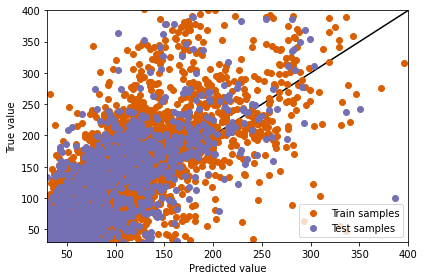

In [ ]:
plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([30, 400], [30, 400], c="k", zorder=0)
plt.xlim([30, 400])
plt.ylim([30, 400])
plt.tight_layout()
plt.show()

Even though the tine is pretty close to the distributions of the datai, it is not perfect.

## To compare with the previous ensemble model, ensembling 6 jobs to see the results.

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    n_jobs=6
)
automl.fit(X_train, y_train)

print(automl.leaderboard())

          rank  ensemble_weight            type      cost   duration
model_id                                                            
19           1             0.64        adaboost  0.329332  24.523175
13           2             0.36  ard_regression  0.372390   5.608666


it is only using two dominant models with the weights: **0.64** and **0.36** - summing for **1**

In [ ]:
import sklearn

train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.829358012485667
Test R2 score: 0.7280956035217977


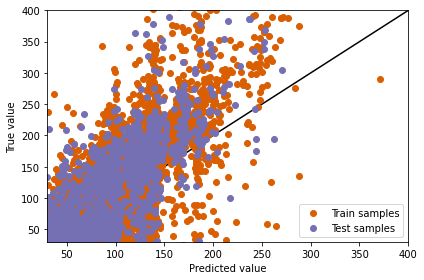

In [ ]:
plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([30, 400], [30, 400], c="k", zorder=0)
plt.xlim([30, 400])
plt.ylim([30, 400])
plt.tight_layout()
plt.show()

The Line is diverging from the distributions of the data - which is a bad indicator.

## As it is seen, there is a decrease even though we applied more models for ensembling. This needs further experiements to find a model (might be a single model or an ensemble model of many) and improvement.

Since this is an analysis task more than a real time example, we might neglect the speed and focus more on the performance metrics:

- R-Squared (R2): This is a measure of the goodness-of-fit of the model, with a value of 1 indicating a perfect fit and a value close to 0 indicating a poor fit.

- Mean Absolute Error (MAE): This is the average difference between the predicted values and the actual values. It gives an idea of the magnitude of the error, but does not provide information about the direction of the error.

- Mean Squared Error (MSE): This is the average of the squared differences between the predicted values and the actual values. It provides information about both the magnitude and direction of the error, and is commonly used in regression problems.

- Root Mean Squared Error (RMSE): This is the square root of the MSE. It is an interpretable measure of the average magnitude of the error, and is often used to compare the performance of different models.

- Adjusted R-Squared: This is a modified version of the R-Squared that adjusts for the number of predictors in the model and the sample size.

From experience, tree-based models work quite well on tabular data. Individually fine-tuning Random Forests, XGBoost, LightGBM etc might give even better results. 

The reason I applied auto-ml approach is to give us an intuition for a start.

## Further Steps:

There are many ways to improve this model.

- Focusing on a specific BRAND analysis would also improve the performance.
- Increasing `time_left_for_this_task` and `per_run_time_limit` might highly affect the performance. On the other hand, it might decrease performance due to overfitting (memorizing training data).
- From personal experience, I would do feature engineering by using current features and try to reduce the input shape (using one robust column instead of inputting 5 columns), and applying Linear Regression algorithm for being:
    - very fast
    - still high in demand
    - easy to visualize & interpret.

- Feature engineering:
    - Feature aggregation: Aggregating features at different levels of granularity can help capture relationships between features and the target variable. For example, aggregating the sales data by brand, promotions, or time can help capture trends and patterns in the data.

    - Creating interaction features: Interaction features capture the relationship between two or more features and can help capture non-linear relationships in the data. For example, the interaction between the discount and months of a product.

    - Dimensionality reduction: High-dimensional data can be reduced to a lower dimension using techniques such as principal component analysis (PCA) or singular value decomposition (SVD).

    - Derived features: New features can be derived from existing features using mathematical operations or statistical methods. For example, the logarithm of a feature can be used to transform a skewed distribution into a normal distribution.

- Apply advanced Linear Regression algorithms:
    - One advanced version of linear regression is Ridge Regression, which is also known as Tikhonov regularization. It is a regularized version of linear regression that adds a penalty term to the loss function to prevent overfitting. The penalty term is proportional to the magnitude of the coefficients, which leads to smaller coefficient values and a smoother model.

    - Another advanced version of linear regression is Lasso Regression, which is also known as L1 regularization. Like ridge regression, it adds a penalty term to the loss function, but it uses the L1 norm of the coefficients instead of the L2 norm. The L1 penalty results in sparse models, where some of the coefficients are exactly equal to zero, which can be useful for feature selection.

    - There are also other advanced versions of linear regression, such as Elastic Net, which is a combination of Ridge and Lasso regularization, and Bayesian Linear Regression, which incorporates prior beliefs about the parameters into the model.

